In [1]:
import numpy as np
import pandas as pd
import torch as torch
import matplotlib.pyplot as plt
import os
import datetime as dt
import seaborn as sns
import torch


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
#Importing all the input vaaribles data

#importing all the temperature data
data_dir = r"C:\Users\HP\OneDrive\Desktop\Monitoring_of_hydraulic_system"
pf_1 = pd.read_csv(os.path.join(data_dir,'PS1.txt'), sep='\t', header = None)
pf_2 = pd.read_csv(os.path.join(data_dir,'PS2.txt'), sep='\t', header=None)
pf_3 = pd.read_csv(os.path.join(data_dir,'PS3.txt'), sep='\t', header=None)
pf_4 = pd.read_csv(os.path.join(data_dir,'PS4.txt'), sep='\t', header=None)
pf_5 = pd.read_csv(os.path.join(data_dir,'PS5.txt'), sep='\t', header=None)
pf_6 = pd.read_csv(os.path.join(data_dir,'PS6.txt'), sep='\t', header=None)

In [6]:
# importing all temperature data
temp_1 = pd.read_csv(os.path.join(data_dir,'TS1.txt'), sep='\t', header=None)
temp_2 = pd.read_csv(os.path.join(data_dir,'TS2.txt'), sep='\t', header=None)
temp_3 = pd.read_csv(os.path.join(data_dir,'TS3.txt'), sep='\t', header=None)
temp_4 = pd.read_csv(os.path.join(data_dir,'TS4.txt'), sep='\t', header=None)

In [7]:
# importing all volume flow rate data
vf_1 = pd.read_csv(os.path.join(data_dir,'FS1.txt'), sep='\t', header=None)
vf_2 = pd.read_csv(os.path.join(data_dir,'FS2.txt'), sep='\t', header=None)

#importing other sensor data
motor_power = pd.read_csv(os.path.join(data_dir,'EPS1.txt'), sep='\t', header=None)
vibiration = pd.read_csv(os.path.join(data_dir,'VS1.txt'), sep='\t', header=None)
cooling_efficiency = pd.read_csv(os.path.join(data_dir,'CE.txt'), sep='\t', header=None)
cooling_power  = pd.read_csv(os.path.join(data_dir,'CP.txt'), sep='\t', header=None)
efficiency_factor = pd.read_csv(os.path.join(data_dir,'SE.txt'), sep='\t', header=None)

In [8]:
pf_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,148.978467,148.977220,148.966916,148.647410,147.968898,147.511646,149.992000,151.536866,150.853116,151.464689,...,148.976562,148.975782,148.976200,148.977447,148.976726,148.977306,148.978122,148.976844,148.976222,148.977125
std,3.684421,3.685462,3.685930,3.790893,4.023828,4.556763,4.280233,3.527235,3.419919,3.458501,...,3.686761,3.686337,3.688244,3.688526,3.684435,3.683719,3.688438,3.689265,3.682870,3.680577
min,144.920000,144.920000,144.560000,144.440000,141.190000,139.460000,142.770000,146.810000,146.440000,146.840000,...,144.460000,144.940000,144.840000,144.890000,144.940000,144.940000,144.880000,144.860000,144.940000,144.940000
25%,147.060000,147.100000,147.100000,146.180000,145.060000,144.770000,146.630000,149.840000,149.650000,150.310000,...,147.070000,147.070000,147.070000,147.080000,147.080000,147.090000,147.090000,147.070000,147.050000,147.060000
50%,148.560000,148.560000,148.560000,148.340000,148.130000,148.060000,150.560000,151.340000,150.520000,151.280000,...,148.580000,148.580000,148.560000,148.580000,148.560000,148.580000,148.560000,148.560000,148.560000,148.560000
75%,150.980000,150.980000,150.980000,150.870000,150.740000,150.710000,152.660000,153.320000,152.420000,153.160000,...,151.000000,150.980000,151.000000,151.000000,151.000000,150.980000,151.000000,150.980000,150.980000,150.980000
max,188.800000,188.880000,188.970000,188.840000,186.110000,187.000000,189.640000,187.880000,188.130000,188.280000,...,188.970000,189.070000,188.960000,188.880000,188.930000,188.910000,188.940000,188.950000,188.850000,188.880000


In [9]:
# Importing the data ( label data)
profile = pd.read_csv(os.path.join(data_dir,'profile.txt'), sep='\t', header=None)

# Assinging five variables to five targets
labels_list = ['y_cooler','y_valve','y_pump','y_accumulator','y_stableFlag']
y_cooler= profile.iloc[:, 0]
y_valve = profile.iloc[:, 1]
y_pump = profile.iloc[:, 2]
y_accumulator = profile.iloc[:, 3]
y_stableFlag = profile.iloc[:, 4]

targetdata = pd.concat([y_cooler,y_valve,y_pump ,y_accumulator,y_stableFlag], axis=1, sort=False)
targetdata.head

<bound method NDFrame.head of         0    1  2    3  4
0       3  100  0  130  1
1       3  100  0  130  1
2       3  100  0  130  1
3       3  100  0  130  1
4       3  100  0  130  1
...   ...  ... ..  ... ..
2200  100  100  0   90  0
2201  100  100  0   90  0
2202  100  100  0   90  0
2203  100  100  0   90  0
2204  100  100  0   90  0

[2205 rows x 5 columns]>

In [10]:
condition = pd.read_csv(os.path.join(data_dir,"profile.txt"), sep='\t', header=None, names = labels_list)

# Preview the first few lines
condition.head()

,y_cooler,y_valve,y_pump,y_accumulator,y_stableFlag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [11]:
# checking the unique vales in y_cooler,y_valve,y_pump,y_accumulator,y_stableFlag
#Storing the targets and the respectiv unique values in a dictionary
d ={'targets':[],'respective_uniquevalues':[]}
for i in enumerate(list(labels_list)):
    k = pd.unique(condition[i[1]])
    d['targets'].append(i[1])
    d['respective_uniquevalues'].append(k)
    
print("Unique_values of {}, which are  stored in the list are {}".format(d['targets'][0],d['respective_uniquevalues'][0])) 
print("Unique_values of {}, which are  stored in the list are {}".format(d['targets'][1],d['respective_uniquevalues'][1]))
print("Unique_values of {}, which are  stored in the list are {}".format(d['targets'][2],d['respective_uniquevalues'][2]))
print("Unique_values of {}, which are  stored in the list are {}".format(d['targets'][3],d['respective_uniquevalues'][3]))
print("Unique_values of {}, which are  stored in the list are {}".format(d['targets'][4],d['respective_uniquevalues'][4]))

Unique_values of y_cooler, which are  stored in the list are [  3  20 100]
Unique_values of y_valve, which are  stored in the list are [100  73  80  90]
Unique_values of y_pump, which are  stored in the list are [0 2 1]
Unique_values of y_accumulator, which are  stored in the list are [130 115 100  90]
Unique_values of y_stableFlag, which are  stored in the list are [1 0]


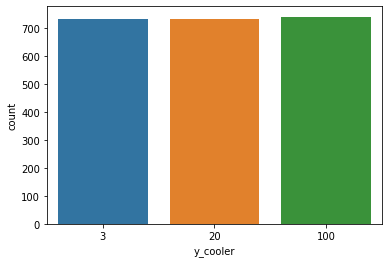

In [12]:
#Graph depicting the number of unique variables in "y_cooler" with repect to their count
ax = sns.countplot(x="y_cooler", data=condition)

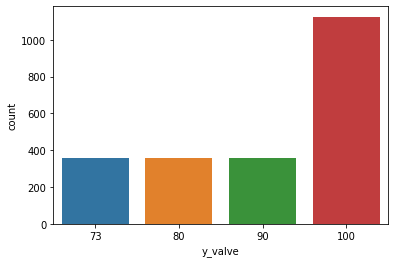

In [13]:
#Graph depicting the number of unique variables in "y_valve" with repect to their count
ax = sns.countplot(x="y_valve", data=condition)

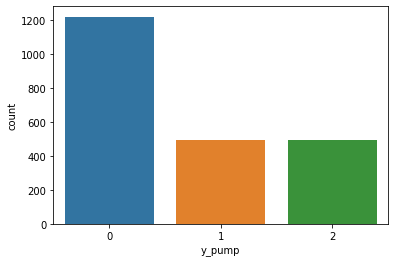

In [14]:
#Graph depicting the number of unique variables in "y_pump" with repect to their count
ax = sns.countplot(x="y_pump", data=condition)

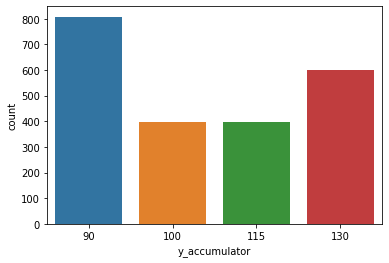

In [15]:
#Graph depicting the number of unique variables in "y_accumulator" with repect to their count
ax = sns.countplot(x="y_accumulator", data=condition)

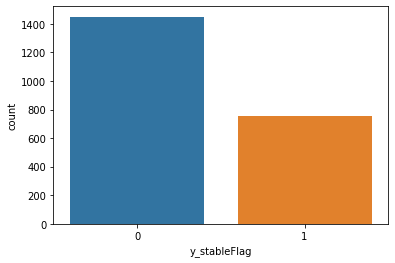

In [16]:
#Graph depicting the number of unique variables in "y_stableFlag" with repect to their count
ax = sns.countplot(x="y_stableFlag", data=condition)

C:\Users\HP\.conda\envs\SE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\.conda\envs\SE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\.conda\envs\SE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='y_stableFlag', ylabel='Density'>

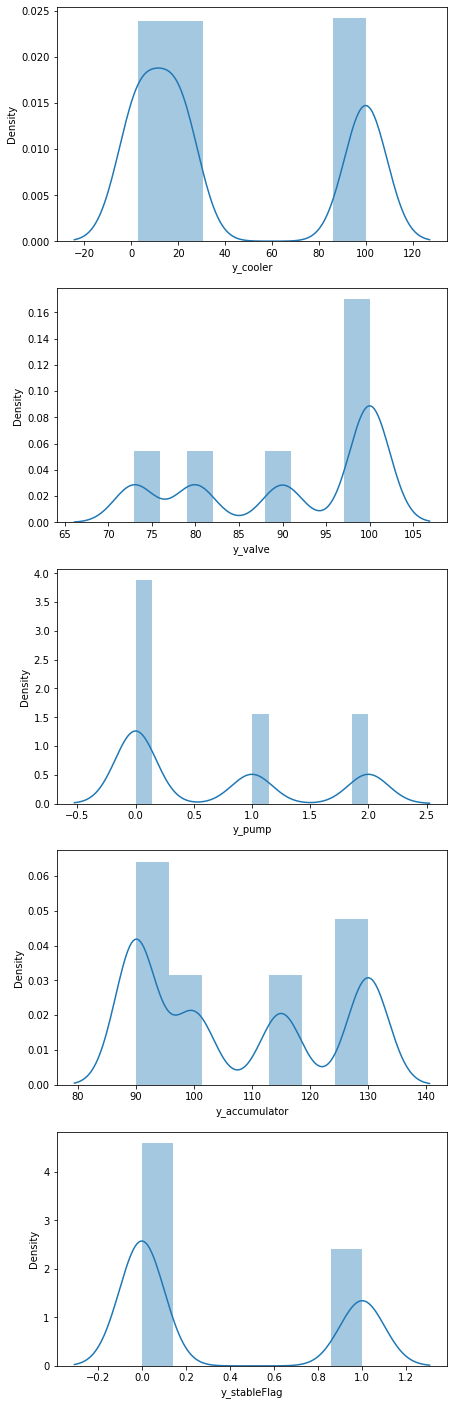

In [17]:
figure,(ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize=(7, 25 ), 
                       nrows=condition.shape[1], ncols=1,sharex = False)

sns.distplot(condition[labels_list[0]], hist=True, ax=ax1)
sns.distplot(condition[labels_list[1]], hist=True, ax=ax2)
sns.distplot(condition[labels_list[2]], hist=True, ax=ax3)
sns.distplot(condition[labels_list[3]], hist=True, ax=ax4)
sns.distplot(condition[labels_list[4]], hist=True, ax=ax5)

In [18]:
# Calculate the mena values for the given data Frame
def mean_values(df):
    df_1 = pd.DataFrame()
    df_1 = df.mean(axis = 1)
    return df_1

In [19]:
PS1_ = pd.DataFrame(mean_values(pf_1))
#PS1_.columns = ['PS1_']

PS2_ = pd.DataFrame(mean_values(pf_2))
PS2_.columns = ['PS2_']

PS3_ = pd.DataFrame(mean_values(pf_3))
PS3_.columns = ['PS3_']

PS4_ = pd.DataFrame(mean_values(pf_4))
PS4_.columns = ['PS4_']

PS5_ = pd.DataFrame(mean_values(pf_5))
PS5_.columns = ['PS5_']

PS6_ = pd.DataFrame(mean_values(pf_6))
PS6_.columns = ['PS6_']

FS1_ = pd.DataFrame(mean_values(vf_1))
FS1_.columns = ['FS1_']

FS2_ = pd.DataFrame(mean_values(vf_2))
FS2_.columns = ['FS2_']

TS1_ = pd.DataFrame(mean_values(temp_1))
TS1_.columns = ['TS1_']

TS2_ = pd.DataFrame(mean_values(temp_2))
TS2_.columns = ['TS2_']

TS3_ = pd.DataFrame(mean_values(temp_3))
TS3_.columns = ['TS3_']

TS4_ = pd.DataFrame(mean_values(temp_4))
TS4_.columns = ['TS4_']

MP_ = pd.DataFrame(mean_values(motor_power))
MP_.columns = ['MP_']

Vib_ = pd.DataFrame(mean_values(vibiration))
Vib_.columns = ['Vib_']

CE_ = pd.DataFrame(mean_values(cooling_efficiency))
CE_.columns = ['CE_']

CP_= pd.DataFrame(mean_values(cooling_power))
CP_.columns = ['CP_']

EF_ = pd.DataFrame(mean_values(efficiency_factor))
EF_.columns = ['EF_']

In [20]:
X = pd.concat([PS1_ , PS2_, PS3_, PS4_, PS5_, PS6_, FS1_, FS2_, TS1_, TS2_, TS3_, TS4_, MP_\
               , Vib_, CE_, CP_, EF_], axis=1)

In [21]:
X.head()

,0,PS2_,PS3_,PS4_,PS5_,PS6_,FS1_,FS2_,TS1_,TS2_,TS3_,TS4_,MP_,Vib_,CE_,CP_,EF_
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267


In [22]:
# Checks the null values in the given dataset
X.isnull(). sum()

0       0
PS2_    0
PS3_    0
PS4_    0
PS5_    0
PS6_    0
FS1_    0
FS2_    0
TS1_    0
TS2_    0
TS3_    0
TS4_    0
MP_     0
Vib_    0
CE_     0
CP_     0
EF_     0
dtype: int64

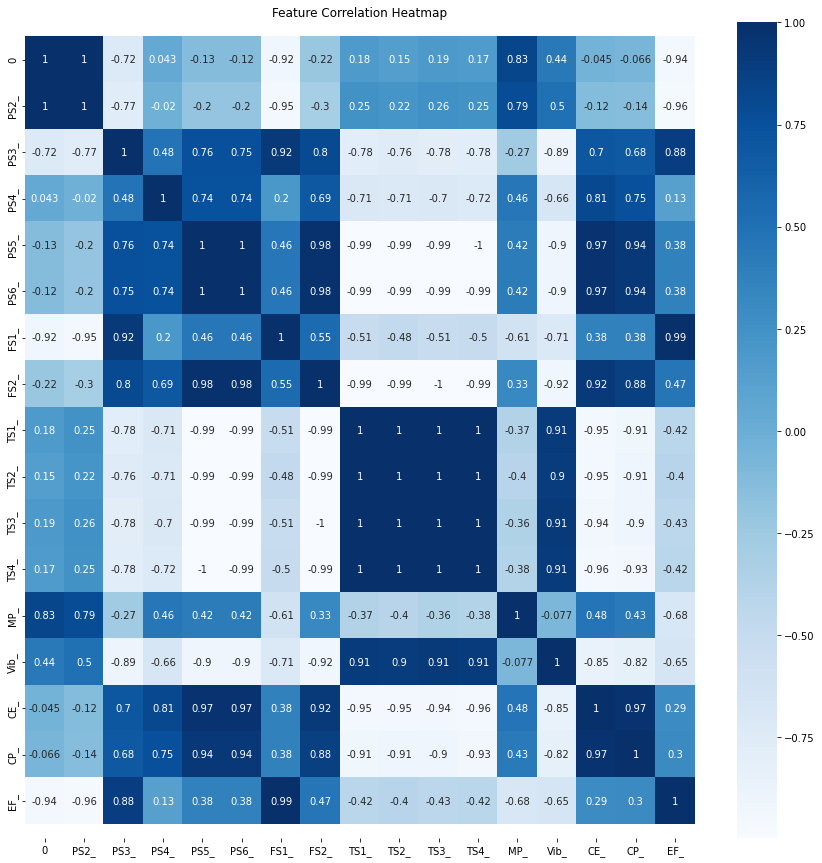

In [23]:
corr = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.3, t-0.3)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
X.to_pickle("X.pkl")
targetdata.to_pickle("Y.pkl")